In [1]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import numpy as np 

In [2]:
df = pd.read_csv('Dataset e analogos/dataset.csv')

In [3]:
df.shape

(10780, 13)

In [4]:
df.isnull().mean().round(2) / 2 * 100

Age                                    0.0
Gender                                 0.0
Daily Social Media Usage(hours)        0.5
Number of Social Media Platforms       0.0
Frequency of Posts                     0.0
Frequency of Checking Notifications    0.5
Self Reported Addiction Score          0.5
Cyberbullying Experience               0.0
Self Esteem Score                      0.5
Sleep Quality                          0.5
Anxiety Score                          0.5
Social Media Fatigue Score             0.0
Mental Health Status                   0.0
dtype: float64

In [5]:
# tradução dos rótulos e seus respectivos valores
df.head()

,Age,Gender,Daily Social Media Usage(hours),Number of Social Media Platforms,Frequency of Posts,Frequency of Checking Notifications,Self Reported Addiction Score,Cyberbullying Experience,Self Esteem Score,Sleep Quality,Anxiety Score,Social Media Fatigue Score,Mental Health Status
0,25,Female,7.0,5,Rarely,Frequently,10.0,0,3.0,5.0,8.0,8,Poor
1,50,Female,2.0,4,Rarely,Frequently,6.0,1,9.0,8.0,4.0,4,Good
2,35,Female,4.0,2,Rarely,Frequently,9.0,0,6.0,6.0,5.0,8,Fair
3,30,Female,2.0,2,Rarely,Rarely,7.0,0,7.0,7.0,3.0,3,Good
4,22,Female,2.0,3,Sometimes,Occasionally,7.0,0,10.0,6.0,3.0,5,Good


In [6]:
df = df.rename(columns={'Age':'idade', 'Gender':'genero', 'Daily Social Media Usage(hours)':'tempo de uso em redes sociais', 'Number of Social Media Platforms':'numero de plataformas usadas',
                   'Frequency of Posts':'frenquencia de posts', 'Frequency of Checking Notifications':'frequencia de verificacao de notificacoes', 'Self Reported Addiction Score':'taxa de reconhecimento de dependencia',
                   'Cyberbullying Score':'experiencia por cyberbullying', 'Self Esteem Score':'taxa de autoestima reportada', 'Sleep Quality':'qualidade de sono', 'Anxiety Score':'taxa de ansiedade',
                   'Social Media Fatigue Score':'fadiga gerada pelo uso de redes sociais', 'Mental Health Status':'status de mental'})

In [7]:
df['genero'] = df['genero'].replace({'Female':'feminino', 'Male':'masculino', 'Other':'outro'})

In [8]:
df['frenquencia de posts'] = df['frenquencia de posts'].replace({'Rarely':'Raramente', 'Sometimes':'Algumas vezes', 'Never':'Nunca',
                                                                 'Always':'Sempre', 'Often':'Geralmente'})

In [9]:
df['frequencia de verificacao de notificacoes'] = df['frequencia de verificacao de notificacoes'].replace({'Frequently':'Frequentimente', 'Occasionally':'Ocasionalmente',
                                                                                                           'Rarely':'Raramente'})

In [10]:
df['status de mental'] = df['status de mental'].replace({'Poor':'Ruim', 'Fair':'Razoavel', 'Excelent':'Excelente', 'Good':'Boa'})

In [11]:
df.head(10)

,idade,genero,tempo de uso em redes sociais,numero de plataformas usadas,frenquencia de posts,frequencia de verificacao de notificacoes,taxa de reconhecimento de dependencia,Cyberbullying Experience,taxa de autoestima reportada,qualidade de sono,taxa de ansiedade,fadiga gerada pelo uso de redes sociais,status de mental
0,25,feminino,7.0,5,Raramente,Frequentimente,10.0,0,3.0,5.0,8.0,8,Ruim
1,50,feminino,2.0,4,Raramente,Frequentimente,6.0,1,9.0,8.0,4.0,4,Boa
2,35,feminino,4.0,2,Raramente,Frequentimente,9.0,0,6.0,6.0,5.0,8,Razoavel
3,30,feminino,2.0,2,Raramente,Raramente,7.0,0,7.0,7.0,3.0,3,Boa
4,22,feminino,2.0,3,Algumas vezes,Ocasionalmente,7.0,0,10.0,6.0,3.0,5,Boa
5,22,masculino,6.0,3,Algumas vezes,Frequentimente,10.0,0,5.0,9.0,6.0,7,Razoavel
6,18,masculino,6.0,1,Algumas vezes,Raramente,10.0,0,4.0,4.0,6.0,4,Ruim
7,45,masculino,3.0,1,Nunca,Frequentimente,7.0,0,8.0,8.0,5.0,4,Boa
8,30,feminino,4.0,4,Sempre,Raramente,9.0,0,6.0,5.0,5.0,5,Razoavel
9,35,masculino,9.0,2,Algumas vezes,Frequentimente,10.0,0,1.0,6.0,7.0,9,Ruim


In [12]:
df.isnull().sum()

idade                                          0
genero                                         0
tempo de uso em redes sociais                113
numero de plataformas usadas                   0
frenquencia de posts                           0
frequencia de verificacao de notificacoes    115
taxa de reconhecimento de dependencia        107
Cyberbullying Experience                       0
taxa de autoestima reportada                 118
qualidade de sono                            110
taxa de ansiedade                             95
fadiga gerada pelo uso de redes sociais        0
status de mental                               0
dtype: int64

In [13]:
df.isnull().mean().round(2) / 2 * 100

idade                                        0.0
genero                                       0.0
tempo de uso em redes sociais                0.5
numero de plataformas usadas                 0.0
frenquencia de posts                         0.0
frequencia de verificacao de notificacoes    0.5
taxa de reconhecimento de dependencia        0.5
Cyberbullying Experience                     0.0
taxa de autoestima reportada                 0.5
qualidade de sono                            0.5
taxa de ansiedade                            0.5
fadiga gerada pelo uso de redes sociais      0.0
status de mental                             0.0
dtype: float64

In [14]:
df = df.dropna()

In [15]:
df.shape

(10137, 13)

<Axes: xlabel='genero', ylabel='idade'>

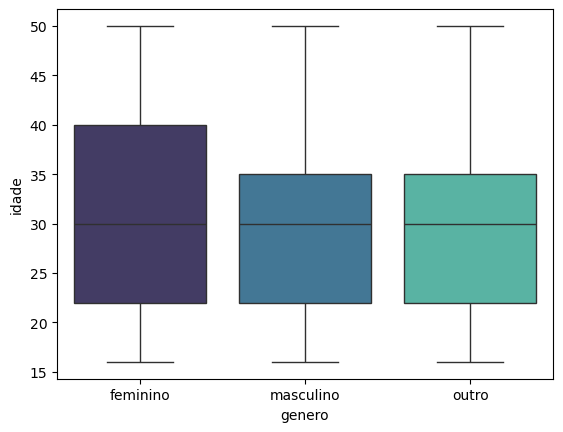

In [16]:
sns.boxplot(df, x=df['genero'], y=df['idade'], hue=df['genero'], palette='mako')

In [17]:
# Verificando assimetrias para genero Feminino
df_F = df.loc[df['genero'] == 'feminino']

In [18]:
Q1 = np.quantile(df_F['idade'], 0.25)
Q2 = np.quantile(df_F['idade'], 0.50)
Q3 = np.quantile(df_F['idade'], 0.75)

In [19]:
Q1, Q2, Q3

(np.float64(22.0), np.float64(30.0), np.float64(40.0))

In [20]:
IQ = Q3 - Q1
IQ

np.float64(18.0)

In [21]:
Valor_superior = Q3 + (IQ * 1.5)
Valor_superior

np.float64(67.0)

In [22]:
Valor_inferior = (IQ * 1.5) - Q1
Valor_inferior

np.float64(5.0)

In [23]:
coeficiente_bowley_feminino= ((Q3 - Q2) - (Q2 - Q1)) / (Q3 - Q1)

In [24]:
coeficiente_bowley_feminino.round(3)

np.float64(0.111)

<Axes: xlabel='idade', ylabel='Count'>

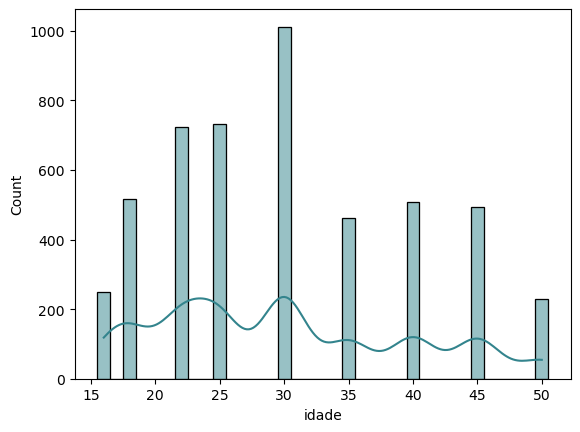

In [25]:
sns.histplot(df_F, x=df_F['idade'], kde=True, discrete=True, color='#33848D')

In [26]:
df_M = df.loc[df['genero'] == 'masculino']

In [27]:
df_M.head()

,idade,genero,tempo de uso em redes sociais,numero de plataformas usadas,frenquencia de posts,frequencia de verificacao de notificacoes,taxa de reconhecimento de dependencia,Cyberbullying Experience,taxa de autoestima reportada,qualidade de sono,taxa de ansiedade,fadiga gerada pelo uso de redes sociais,status de mental
5,22,masculino,6.0,3,Algumas vezes,Frequentimente,10.0,0,5.0,9.0,6.0,7,Razoavel
6,18,masculino,6.0,1,Algumas vezes,Raramente,10.0,0,4.0,4.0,6.0,4,Ruim
7,45,masculino,3.0,1,Nunca,Frequentimente,7.0,0,8.0,8.0,5.0,4,Boa
9,35,masculino,9.0,2,Algumas vezes,Frequentimente,10.0,0,1.0,6.0,7.0,9,Ruim
11,50,masculino,0.0,4,Nunca,Frequentimente,6.0,1,10.0,3.0,1.0,3,Boa


In [28]:
Q1_M = np.quantile(df_M['idade'], 0.25)
Q2_M = np.quantile(df_M['idade'], 0.50)
Q3_M = np.quantile(df_M['idade'], 0.75)
IQ_M = Q3_M - Q1_M

In [29]:
Coeficiente_Bowley_masculino = ((Q3_M - Q2_M) - (Q2_M - Q1_M)) / (Q3_M - Q1_M)

In [30]:
Coeficiente_Bowley_masculino.round(3)

np.float64(-0.231)

<Axes: xlabel='idade', ylabel='Count'>

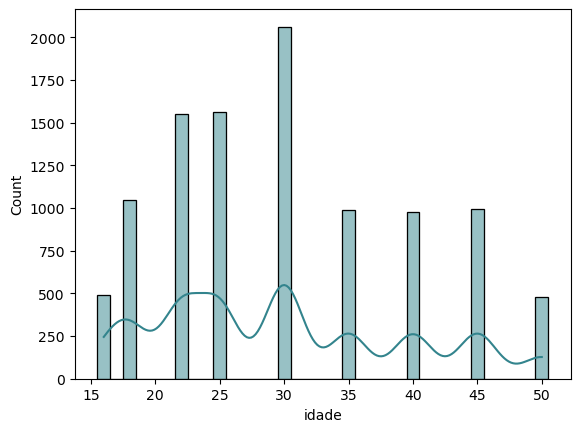

In [31]:
sns.histplot(df_M, x=df['idade'], kde=True, discrete=True, color='#33848D')

In [32]:
df_O = df.loc[df['genero'] == 'outro']

In [33]:
df_O.head(20)

,idade,genero,tempo de uso em redes sociais,numero de plataformas usadas,frenquencia de posts,frequencia de verificacao de notificacoes,taxa de reconhecimento de dependencia,Cyberbullying Experience,taxa de autoestima reportada,qualidade de sono,taxa de ansiedade,fadiga gerada pelo uso de redes sociais,status de mental
24,30,outro,2.0,2,Raramente,Ocasionalmente,7.0,0,8.0,5.0,4.0,4,Boa
55,45,outro,3.0,1,Raramente,Ocasionalmente,10.0,0,8.0,4.0,3.0,4,Boa
85,25,outro,12.0,5,Algumas vezes,Frequentimente,10.0,0,1.0,7.0,10.0,8,Ruim
169,30,outro,0.0,2,Nunca,Frequentimente,6.0,0,10.0,6.0,2.0,3,Excellent
232,30,outro,3.0,4,Algumas vezes,Ocasionalmente,6.0,0,9.0,6.0,4.0,6,Boa
274,30,outro,7.0,4,Algumas vezes,Ocasionalmente,10.0,1,3.0,6.0,8.0,6,Ruim
300,18,outro,6.0,3,Algumas vezes,Ocasionalmente,10.0,1,4.0,4.0,6.0,5,Ruim
319,22,outro,2.0,1,Geralmente,Ocasionalmente,6.0,0,8.0,9.0,3.0,5,Excellent
359,30,outro,4.0,2,Raramente,Frequentimente,10.0,0,8.0,8.0,8.0,6,Boa
397,25,outro,6.0,2,Algumas vezes,Ocasionalmente,10.0,0,4.0,3.0,4.0,5,Ruim


In [34]:
Q1_O = np.quantile(df_O['idade'], 0.25)
Q2_O = np.quantile(df_O['idade'], 0.50)
Q3_O = np.quantile(df_O['idade'], 0.75)
Coeficiente_Bowley_outros = ((Q3_O - Q2_O) - (Q2_O - Q1_O)) / (Q3_O - Q1_O)
Coeficiente_Bowley_outros.round(3)

np.float64(-0.231)

<Axes: xlabel='idade', ylabel='Count'>

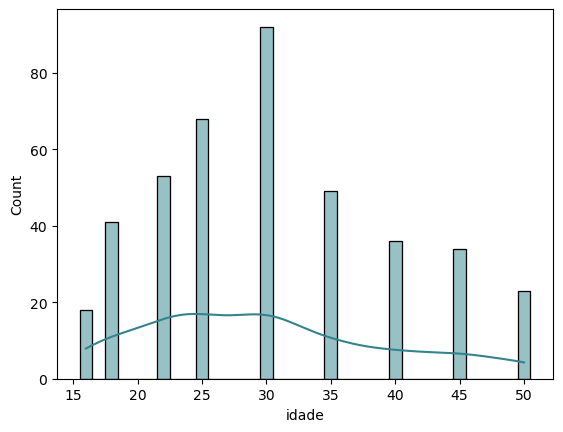

In [35]:
sns.histplot(df_O, x=df_O['idade'], kde=True, discrete=True, color='#33848D')